# Fourier Transform

Virtually everything in the world can be described via a waveform - a function of time, space or some other variable. And all waveforms, no matter how complex, are actually just the sum of simple sinusoids of different frequencies. The Fourier Transform decomposes a waveform - basically any real world waveform, into sinusoids. Thus, it allows us to go from the time domain to the frequency domain.


<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/time_freq_domain.png">


<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/fourier_transform_fig.png">

The Fourier Transform is like a prism.

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/prism.png">



In [1]:
# The first time you run in your Colab environment, you will need to clone the repo to Colab (then restart runtime)
! git clone https://github.com/BeaverWorksMedlytics/Week2_public.git

Cloning into 'Week2_public'...
remote: Counting objects: 67, done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 67 (delta 7), reused 20 (delta 7), pack-reused 45
Unpacking objects: 100% (67/67), done.


In [2]:
import os
os.chdir('Week2_public')
os.listdir()

['02_TimeSeries_Exercise2.ipynb',
 '00_SIR.ipynb',
 '.git',
 '01_TimeSeries_Exercise1.ipynb',
 '04_FourierTransforms.ipynb',
 'ecg.txt',
 'imgs',
 'multiTimeline.csv',
 'Neulog_Instructions.docx',
 '03_SignalsProcessing.ipynb',
 'sounds',
 'README.md']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'figure.figsize':(10,6)})

## Complex Numbers
Before we define Fourier Transform, let's briefly review complex numbers. Recall that imaginary number __i__ is defined as a square root of -1:


$$i^2 = -1$$

Also, recall the Euler's formula ([the proof is cute and uses Taylor series](https://www.youtube.com/watch?v=jcrQ3rPUYjc)):

$$e^{ix} = cos(x) + i*sin(x)$$

If we put in a general complex number, we get:

$$e^{x+iy} = e^x(cos(y) + i*sin(y))$$

*By the way, python uses $j$ instead of $i$. It handles computation with complex numbers with relative ease, though.*

In [4]:
z1 = 1+2j
z1

(1+2j)

In [0]:
z2 = 3-3j 

In [6]:
z1+z1, z1-z2

((2+4j), (-2+5j))

In [7]:
z1*z2, z1/z2

((9+3j), (-0.16666666666666666+0.5j))

In [8]:
np.exp(z1)

(-1.1312043837568135+2.4717266720048188j)

In [9]:
np.exp(z1).real, np.exp(z1).imag

(-1.1312043837568135, 2.4717266720048188)

An imaginary number has a magnitude (amplitude) and angle (phase)


<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/complex_plane.png">




In [10]:
# magnitude and the angle of the complex number
mag = abs(z1)
ang = np.angle(z1)

print(mag, ang)

2.23606797749979 1.1071487177940904



## Fourier Transform Definition

The Fourier Transform is a function that takes a signal in the time domain $g(t)$ and translates it into one in the frequency domain, $G(\omega)$.  The *inverse* Fourier Transform takes a signal in the frequency domain $G(\omega)$ and translates it into one in the time domain $g(t)$:

$$G(\omega) = \int_{-\infty}^\infty g(t) e^{-i \omega t} dt$$
$$g(t) = \int_{-\infty}^\infty G(\omega) e^{i \omega t} d\omega$$


If you're interested in getting some intuition behind this math, you should check out this [pretty nifty video](https://www.youtube.com/watch?v=spUNpyF58BY).


For our purposes, we will just be using the discrete version...


## Discrete Fourier Transform (DFT) 
$$G[n] = \sum_{k=0}^{N-1} g[k] e^{-i 2 \pi k \left({\frac{n}{N}}\right) }$$

Where:

* $N$ is the total number of samples
* $g[k]$ is the $k^{th}$ sample for the time-domain function (i.e. the DFT input)
* $G[n]$ is the output of the DFT for the $n^{th}$ frequency bin.  To get the frequency, you have to multiply by the sample rate.  


### So what does the Fourier Transform give us?

* The amplitudes of simple sine waves
* Their starting position - phase (we won't get into this part much)

### What sine wave frequencies are used?

* Answer: This is determined by how many samples are provided to the Fourier Transform
* Frequencies range from 0 to (number of samples) / 2
* **Example: If your sample rate is 100Hz, and you give the FFT 100 samples, the FFT will return the amplitude of the components with frequencies 0 to 50Hz.**

In [0]:
def DFT_slow(g):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param g: (array)
    """
    N = g.size
    G = np.zeros((N,), dtype=complex)
    
    for n in range(N):
      for k in range(N):
        G[n] += g[k]*(np.exp(-2j*np.pi*n*k/N))
    return G

def DFT(g):
  N = g.size
  n = np.arange(N)
  k = n.reshape(N, 1)
  
  e = np.exp(-2j * np.pi * k * n / N)
  G = np.dot(e, g)
  
  return G

t = np.linspace(0, num_sec, num_pts*num_sec)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

#print(DFT_slow(s))
#DFT(s)

Let's see how this works.

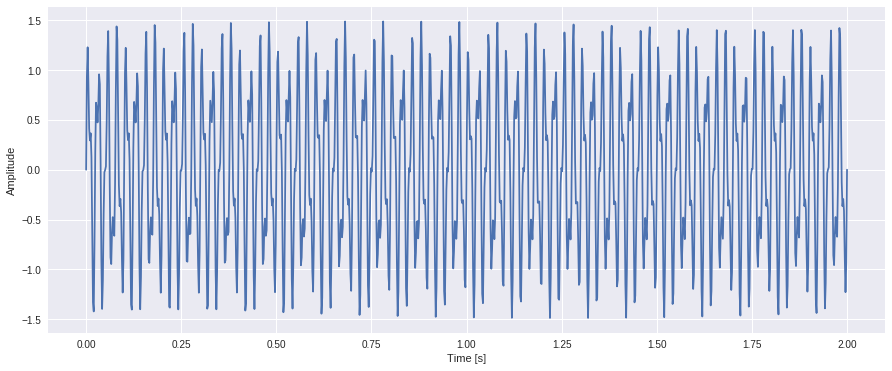

In [66]:
num_sec = 2         # sampling period (in seconds)
num_pts = 500       # samples per second


# make a complex signal with two sinusoids
t = np.linspace(0, num_sec, num_pts*num_sec)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.figure(figsize=(15,6))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

### *Aside:*
The FFT outputs an array of length N corresponding to N/2 frequencies, and N/2 of their complex congugates.   

For real number inputs is $n$ the complex conjugate of $N - n$.  This is true for all numbers in the sequence.

Because the second half of the sequence gives us no new information we can already conclude that the half of the FT sequence is the output we need.

In [32]:
# Look at the output of the fft
fft = np.fft.fft(s)  

for i in range(3):
    print("\nValue at index {}:\t{}".format(i, fft[i]), "\nValue at index {}:\t{}".format(fft.size - i, fft[-i]))



Value at index 0:	(1.9539925233402755e-13+0j) 
Value at index 1000:	(1.9539925233402755e-13+0j)

Value at index 1:	(4.617197827716524e-05-0.014696948699840062j) 
Value at index 999:	(4.617197826634056e-05+0.01469694869983268j)

Value at index 2:	(0.00018476273461720538-0.029405515477137323j) 
Value at index 998:	(0.00018476273461193182+0.02940551547713527j)


In [0]:
Fs = 1/(t[1] - t[0])     # sample rate
N = s.size               # number of samples (length of signal)

k = np.arange(N)         # frequncy bins
T = N/Fs                 # frequency interval of a single bin
frq = k/T                # two sides frequency range
frq = frq[range(N//2)]   # one side frequency range (Fourier transform outputs symmetric frequencies)


In [47]:
# Perform Fourier Transform using your function DFT() and numpy's fft

import time 

stime = time.time()
ft_slow = DFT_slow(s)*T/N
ft_slow = ft_slow[range(N//2)]
print("Slow function took {} seconds to run".format(time.time()-stime))

stime = time.time()
ft = DFT(s)*T/N
ft = ft[range(N//2)]
print("Function took {} seconds to run".format(time.time()-stime))

stime = time.time()
ft_np = np.fft.fft(s)*T/N
ft_np = ft_np[range(N//2)]
print("Numpy function took {} seconds to run".format(time.time()-stime))

Slow function took 4.556203603744507 seconds to run
Function took 0.08404779434204102 seconds to run
Numpy function took 0.0006253719329833984 seconds to run


Now plot the spectrum!

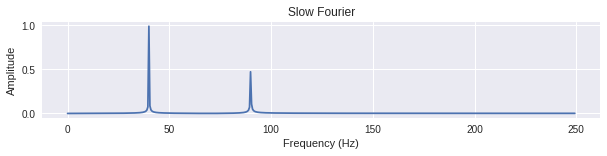

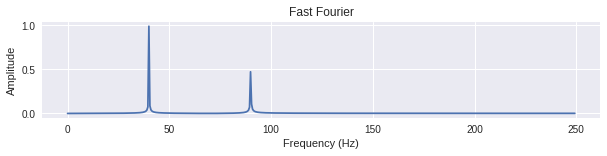

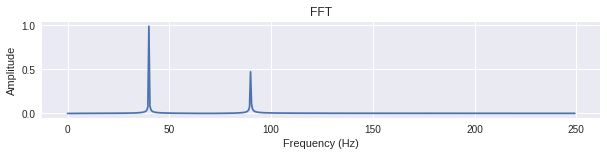

In [63]:
# PLOT

plt.figure()
plt.subplot(3,1,1)
plt.title("Slow Fourier")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(frq, np.abs(ft_slow))
plt.show()

plt.figure()
plt.subplot(3,1,2)
plt.title("Fast Fourier")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(frq, np.abs(ft))
plt.show()

plt.figure()
plt.subplot(3,1,3)
plt.title("FFT")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(frq, np.abs(ft_np))
plt.show()

## Inverse Fourier Transform (IFT)


Recall: 


#### Discrete Fourier Transform (DFT) 
$$G[n] = \sum_{k=0}^{N-1} g[k] e^{-i 2 \pi k \left({\frac{n}{N}}\right) }$$

#### Inverse Discrete  Fourier Transform (IDFT)
$$g[k]=\frac{1}{N} \sum_{n=0}^{N-1}G[n]e^{i2\pi k\left({\frac{n}{N}}\right) }$$


**Meaning**:

* $N$ is the total number of samples
* $g[k]$ is the $k^{th}$ sample in the time-domain 
* $G[n]$ is the $n^{th}$ sample in the frequency-domain 

In [0]:
# Take the Fourier Transform
# Then take the Inverse Fourier Transform

fft = np.fft.fft(s)
s_recon = np.fft.ifft(fft)

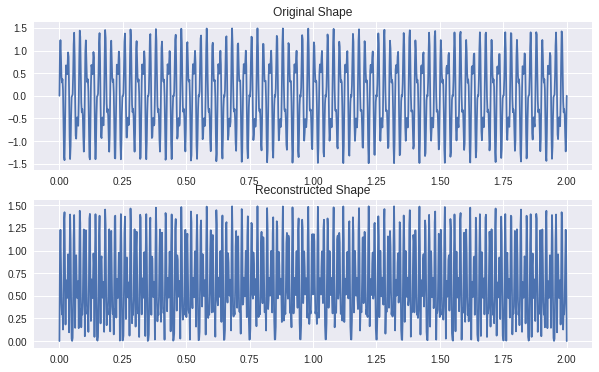

In [67]:
# Plot it!

plt.figure()
plt.subplot(2,1,1)
plt.title("Original Shape")
plt.plot(t, s)

plt.subplot(2,1,2)
plt.title("Reconstructed Shape")
plt.plot(t, abs(s_recon))

### Yay!
We can decompose a signal into its component frequencies, and reconstruct it back to the time domain!

Let's try with a more complicated signal.

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


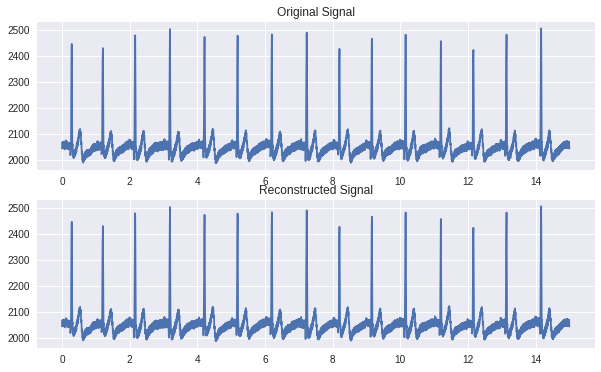

In [70]:
y_ecg = np.loadtxt('https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/ecg.txt',skiprows=4)

n_points = len(y_ecg)
f = 1000
n_sec = n_points/f
t = np.arange(0, n_points)/f

# FFT and IFFT
fft_ecg = np.fft.fft(y_ecg)
y_ecg_recon = np.fft.ifft(fft_ecg)

#PLOT
plt.figure()
plt.subplot(2,1,1)
plt.title("Original Signal")
plt.plot(t, y_ecg)

plt.subplot(2,1,2)
plt.title("Reconstructed Signal")
plt.plot(t, y_ecg_recon)

Okay, well that looks pretty good, but how well were we able to reconstruct the signal really?

In [71]:
np.corrcoef(abs(y_ecg), abs(y_ecg_recon)) #perfectly reconstructed signal 

array([[1., 1.],
       [1., 1.]])

[]

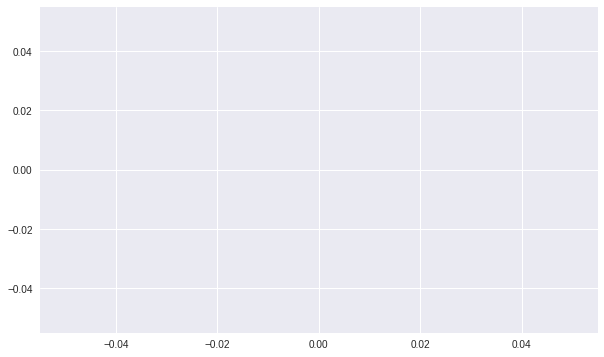

In [73]:
# PLOT THE FREQUENCY SPECTRUM
Fs = 1/(t[1] - t[0])     # sample rate
N = s.size               # number of samples (length of signal)

k = np.arange(N)         # frequncy bins
T = N/Fs                 # frequency interval of a single bin
frq = k/T                # two sides frequency range
frq = frq[range(N//2)]   # one side frequency range (Fourier transform outputs symmetric frequencies)

plt.figure()
plt.plot()

## Okay, but that was a relatively periodic signal...
Let's try with a signal that doesn't look periodic at all!

In [0]:
import scipy.io.wavfile
from IPython.display import Audio

# original signal
(sample_rate, y_newt) = scipy.io.wavfile.read("./sounds/newt.wav")
t = np.arange(0, len(y_newt)/sample_rate, 1/sample_rate)

print('Sample rate: {} Hz'.format(sample_rate))

In [0]:
# PLOT THE FREQUENCY SPECTRUM



In [0]:
# FFT, IFFT


# PLOT


In [0]:
np.corrcoef(abs(y_newt), abs(y_newt_recon))

In [0]:
# Original signal
Audio(data=y_newt, rate=sample_rate)

In [0]:
# Digitized signal
Audio(data=abs(y_newt_recon), rate=sample_rate)

# Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of sound or other signal as they vary with time. Spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

This is a great representation because it captures both time and frequency information!

In [0]:
from scipy import signal

(sample_rate, y_newt) = scipy.io.wavfile.read("./sounds/newt.wav")
sample_freq, segment_time, spec_data = signal.spectrogram(y_newt,sample_rate)

ValueError: ignored

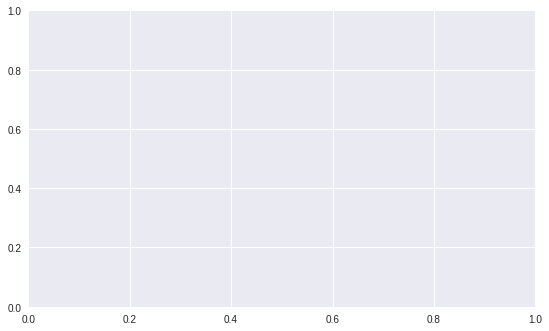

In [77]:
# PLOT
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(t,y_newt)
plt.title('Original Signal')

plt.subplot(2,2,3)
plt.pcolormesh(segment_time, sample_freq, spec_data,cmap='jet',vmax=10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Newt Spectogram")

plt.subplot(2,2,4)
plt.title("Newt Spectrum")
plt.xlabel("Amplitude")
plt.ylabel("Frequency [Hz]")
plt.plot(np.abs(fft_plot),frq)  
plt.xlim([0,5])
plt.ylim([0,max(frq)])